# Path Visualization

Garrett Lappe - garrett.l.lappe@gmail.com

This notebook performs some data transformation and plots the mouse paths that were collected.

Mostly used for EDA and data validation.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data_dir = 'data\\'

In [4]:
input_files = ['button_log_2020-03-08.csv']

df = pd.DataFrame(columns=['button_id','action','x','y','t','button_x','button_y','button_width','button_height'])

for f in input_files:
    new_df = pd.read_csv(data_dir + f, header=None)
    new_df.columns = ['button_id','action','x','y','t','button_x','button_y','button_width','button_height']
    
    df = df.append(new_df, ignore_index=True)

In [5]:
len(df)

6125

In [6]:
df.drop_duplicates(inplace=True)
len(df.drop_duplicates())

6125

In [7]:
df.head()

,button_id,action,x,y,t,button_x,button_y,button_width,button_height
0,1,MOVE,500,12,0.318071,276,419,45,39
1,1,MOVE,500,13,0.320072,276,419,45,39
2,1,MOVE,500,14,0.321072,276,419,45,39
3,1,MOVE,500,16,0.322072,276,419,45,39
4,1,MOVE,499,16,0.323073,276,419,45,39


In [8]:
button_start_df = df.sort_values(by='t').groupby(['button_x',
                                                  'button_y',
                                                  'button_width',
                                                  'button_height']).first().reset_index()
button_start_df.columns = ['start_' + c for c in button_start_df.columns.values]
button_start_df

,start_button_x,start_button_y,start_button_width,start_button_height,start_button_id,start_action,start_x,start_y,start_t
0,42,159,36,65,7,MOVE,672,87,0.103655
1,135,99,73,46,5,MOVE,372,412,0.282478
2,140,171,71,20,9,MOVE,914,282,0.190042
3,180,180,97,82,9,MOVE,530,214,0.201844
4,242,388,81,42,2,MOVE,538,113,0.194052
5,255,158,95,41,10,MOVE,231,238,0.274027
6,276,419,45,39,1,MOVE,500,12,0.318071
7,353,392,54,60,4,MOVE,615,340,0.323133
8,373,339,99,27,7,MOVE,772,425,0.126031
9,455,91,16,78,5,MOVE,548,409,0.273064


### Adding start_x and start_y

In [9]:
df = df.merge(button_start_df, 
              left_on=['button_x',
                       'button_y',
                       'button_width',
                       'button_height'], 
              right_on=['start_button_x',
                        'start_button_y',
                        'start_button_width',
                        'start_button_height']).drop(columns=['start_button_x',
                                                              'start_button_y',
                                                              'start_button_width',
                                                              'start_button_height',
                                                              'start_t',
                                                              'start_button_id',
                                                              'start_action'])
df

,button_id,action,x,y,t,button_x,button_y,button_width,button_height,start_x,start_y
0,1,MOVE,500,12,0.318071,276,419,45,39,500,12
1,1,MOVE,500,13,0.320072,276,419,45,39,500,12
2,1,MOVE,500,14,0.321072,276,419,45,39,500,12
3,1,MOVE,500,16,0.322072,276,419,45,39,500,12
4,1,MOVE,499,16,0.323073,276,419,45,39,500,12
...,...,...,...,...,...,...,...,...,...,...,...
6120,10,MOVE,277,164,0.456322,255,158,95,41,231,238
6121,10,MOVE,277,163,0.456322,255,158,95,41,231,238
6122,10,MOVE,278,162,0.461327,255,158,95,41,231,238
6123,10,MOVE,278,161,0.471329,255,158,95,41,231,238


### Enumerating each path

In [10]:
buttons = df[['button_x',
              'button_y',
              'button_width',
              'button_height']].drop_duplicates().reset_index(drop=True).reset_index()
buttons

,index,button_x,button_y,button_width,button_height
0,0,276,419,45,39
1,1,541,337,85,66
2,2,599,305,69,70
3,3,353,392,54,60
4,4,135,99,73,46
5,5,664,65,20,60
6,6,42,159,36,65
7,7,899,270,43,38
8,8,140,171,71,20
9,9,731,195,85,84


In [11]:
df.drop(columns='button_id', axis=1, inplace=True)  # button_id resets every time the GUI is run (50 buttons)
df.head()

,action,x,y,t,button_x,button_y,button_width,button_height,start_x,start_y
0,MOVE,500,12,0.318071,276,419,45,39,500,12
1,MOVE,500,13,0.320072,276,419,45,39,500,12
2,MOVE,500,14,0.321072,276,419,45,39,500,12
3,MOVE,500,16,0.322072,276,419,45,39,500,12
4,MOVE,499,16,0.323073,276,419,45,39,500,12


### Adding true button id (index) to data

In [12]:
df = df.merge(buttons, on=['button_x',
                           'button_y',
                           'button_width',
                           'button_height'])
df

,action,x,y,t,button_x,button_y,button_width,button_height,start_x,start_y,index
0,MOVE,500,12,0.318071,276,419,45,39,500,12,0
1,MOVE,500,13,0.320072,276,419,45,39,500,12,0
2,MOVE,500,14,0.321072,276,419,45,39,500,12,0
3,MOVE,500,16,0.322072,276,419,45,39,500,12,0
4,MOVE,499,16,0.323073,276,419,45,39,500,12,0
...,...,...,...,...,...,...,...,...,...,...,...
6120,MOVE,277,164,0.456322,255,158,95,41,231,238,19
6121,MOVE,277,163,0.456322,255,158,95,41,231,238,19
6122,MOVE,278,162,0.461327,255,158,95,41,231,238,19
6123,MOVE,278,161,0.471329,255,158,95,41,231,238,19


### Making a new DataFrame for each path

In [13]:
path_dfs = [df[df['index']==i] for i in set(df['index'].values)]

In [14]:
path_dfs[0]  # path #1

,action,x,y,t,button_x,button_y,button_width,button_height,start_x,start_y,index
0,MOVE,500,12,0.318071,276,419,45,39,500,12,0
1,MOVE,500,13,0.320072,276,419,45,39,500,12,0
2,MOVE,500,14,0.321072,276,419,45,39,500,12,0
3,MOVE,500,16,0.322072,276,419,45,39,500,12,0
4,MOVE,499,16,0.323073,276,419,45,39,500,12,0
...,...,...,...,...,...,...,...,...,...,...,...
471,MOVE,288,436,1.190028,276,419,45,39,500,12,0
472,MOVE,288,437,1.195029,276,419,45,39,500,12,0
473,MOVE,288,438,1.199023,276,419,45,39,500,12,0
474,MOVE,288,439,1.205032,276,419,45,39,500,12,0


In [15]:
path_dfs[1]  # path #2

,action,x,y,t,button_x,button_y,button_width,button_height,start_x,start_y,index
476,MOVE,289,439,0.239076,541,337,85,66,289,439,1
477,MOVE,290,439,0.241068,541,337,85,66,289,439,1
478,MOVE,290,438,0.242068,541,337,85,66,289,439,1
479,MOVE,291,438,0.244069,541,337,85,66,289,439,1
480,MOVE,293,436,0.245069,541,337,85,66,289,439,1
...,...,...,...,...,...,...,...,...,...,...,...
696,MOVE,554,380,0.549670,541,337,85,66,289,439,1
697,MOVE,555,380,0.554679,541,337,85,66,289,439,1
698,MOVE,556,380,0.562681,541,337,85,66,289,439,1
699,MOVE,556,379,0.567682,541,337,85,66,289,439,1


In [16]:
ex = path_dfs[-5]
ex

,action,x,y,t,button_x,button_y,button_width,button_height,start_x,start_y,index
5029,MOVE,467,140,0.004009,760,381,91,95,467,140,15
5030,MOVE,467,141,0.273073,760,381,91,95,467,140,15
5031,MOVE,467,142,0.276066,760,381,91,95,467,140,15
5032,MOVE,468,143,0.277074,760,381,91,95,467,140,15
5033,MOVE,468,144,0.278066,760,381,91,95,467,140,15
...,...,...,...,...,...,...,...,...,...,...,...
5371,MOVE,771,425,1.151124,760,381,91,95,467,140,15
5372,MOVE,772,425,1.153125,760,381,91,95,467,140,15
5373,MOVE,772,426,1.154124,760,381,91,95,467,140,15
5374,MOVE,773,426,1.160117,760,381,91,95,467,140,15


### Visualization

In [17]:
import pylab

In [18]:
# plots the outline of the button based on its location and dimensions
#
def plot_button(button_x, button_y, button_width, button_height):
    top_x = list(range(button_x, button_x + button_width))
    top_y = [button_y]*button_width
    
    left_y = list(range(button_y, button_y + button_height))
    left_x = [button_x]*button_height
    
    right_y = list(range(button_y, button_y + button_height))
    right_x = [button_x + button_width]*button_height
    
    bottom_x = list(range(button_x, button_x + button_width))
    bottom_y = [button_y + button_height]*button_width
    
    # testing - combine and plot all edge points together
    #all_x = top_x + right_x + bottom_x + left_x
    #all_y = top_y + right_y + bottom_y + left_y
    #pylab.plot(all_x, all_y)
    
    pylab.plot(top_x, top_y)
    pylab.plot(bottom_x, bottom_y)
    pylab.plot(right_x, right_y)
    pylab.plot(left_x, left_y)

In [19]:
import os

Path 0


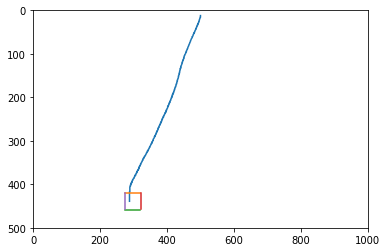

Path 1


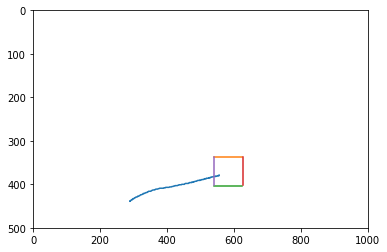

Path 2


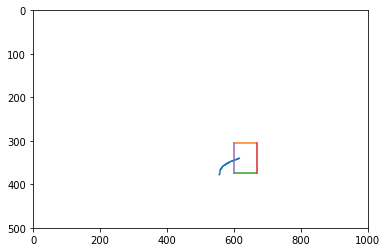

Path 3


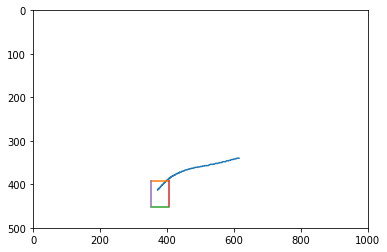

Path 4


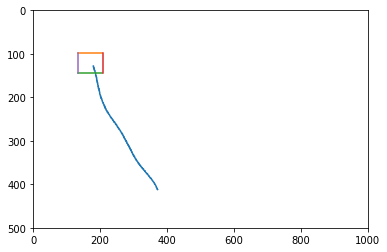

Path 5


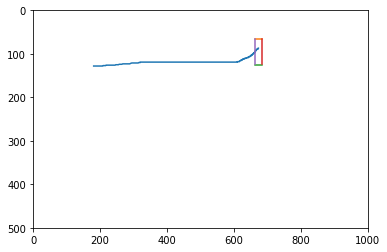

Path 6


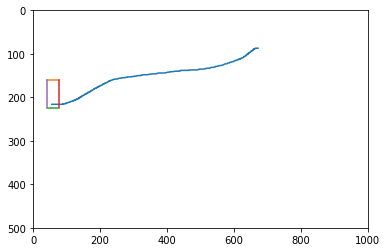

Path 7


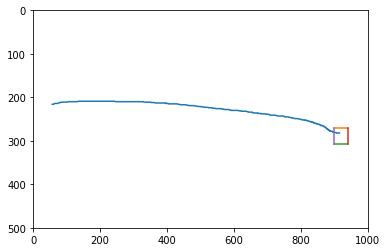

Path 8


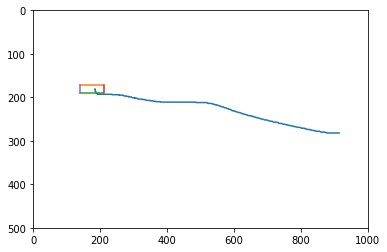

Path 9


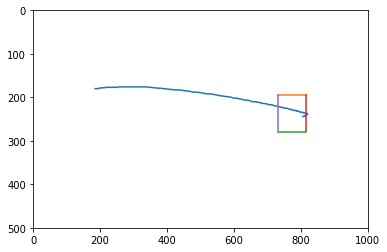

Path 10


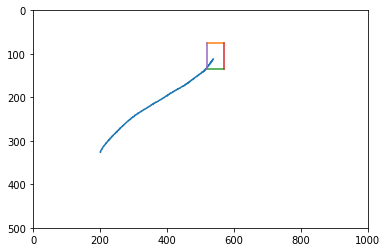

Path 11


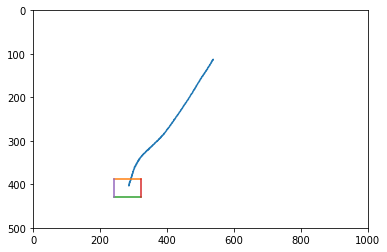

Path 12


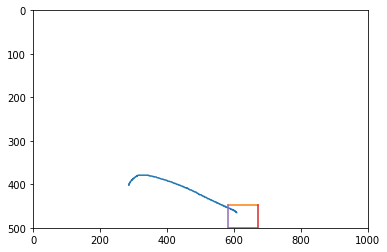

Path 13


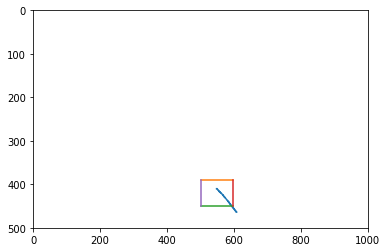

Path 14


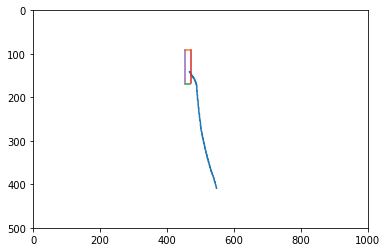

Path 15


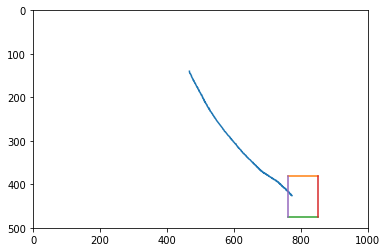

Path 16


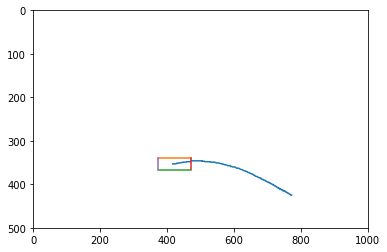

Path 17


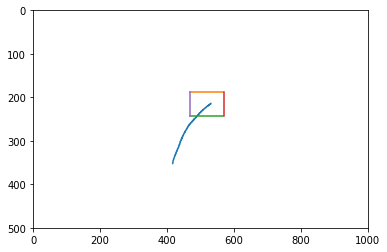

Path 18


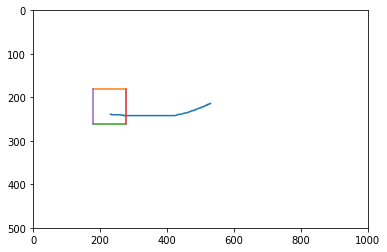

Path 19


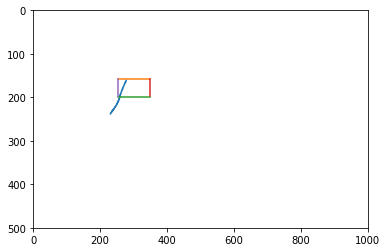

In [20]:
img_dir = 'path_imgs\\'
if not os.path.exists(img_dir):
    os.mkdir(img_dir)

for i in range(len(path_dfs)):
    print('Path', i)
    pylab.plot(path_dfs[i].x, path_dfs[i].y)
    
    # fix axes limits
    pylab.ylim([500,0])
    pylab.xlim([0,1000])
    
    #pylab.axis('off')  # save img only the blue mouse path
    #pylab.savefig('path_imgs\\path_{}.jpg'.format(i))  # save the image before plotting the button
    
    plot_button(path_dfs[i].button_x.iloc[0],
                path_dfs[i].button_y.iloc[0],
                path_dfs[i].button_width.iloc[0],
                path_dfs[i].button_height.iloc[0])
    
    pylab.axis('on')  # turn back on for visualization
    pylab.show()

In [ ]:
len(path_dfs)